# Weak Kidney - K Nearest Neighbours

In [1]:
import some_load_train_evaluate_functions as ml

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Weak/Failing kidneys data

weak_kidney_df = ml.get_data_of_disease(driver, 'Weak/Failing kidneys')
weak_kidney_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Weak/Failing kidneys
0,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
1,93708,0,66,23.7,116.0,1.218750,0.192,0.127,NaN,0.7,...,109.00,22.0,13.2,58.32,2.870,247.0,32.0,30.1,0.655,0
2,93709,0,75,38.9,72.8,1.121212,0.009,0.017,28.561,0.6,...,129.00,31.0,15.4,NaN,NaN,NaN,21.0,46.5,NaN,0
3,93711,1,56,21.3,165.0,1.290323,0.173,0.079,31.115,0.4,...,40.60,19.0,14.7,31.68,4.086,139.0,16.0,34.8,0.542,0
4,93713,1,67,23.5,63.5,2.047619,0.028,0.028,18.344,0.6,...,238.00,26.0,14.2,NaN,NaN,123.0,27.0,28.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,102950,1,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5556,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,0
5557,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
5558,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0


### Training

In [4]:
knn_classifier = ml.KNeighborsClassifier()

# Attributes and Labels

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

# Training

knn_classifier.fit(X_train, y_train)

# Accuracy scores

y_pred = knn_classifier.predict(X_val)

print('Training Accuracy: ',ml.accuracy_score(y_train, knn_classifier.predict(X_train)))

print('Testing Accuracy: ',ml.accuracy_score(y_val, y_pred))

Training Accuracy:  0.9622302158273381
Testing Accuracy:  0.9653776978417267


## Feature Selection

### Correlation Analysis

In [5]:
knn_classifier_test = ml.KNeighborsClassifier()

In [6]:
pos_corr, neg_corr = ml.get_correlated_features(weak_kidney_df,'Weak/Failing kidneys',pos=0.0,neg=-0.0)

corr_features = ['Gender'] + list(pos_corr.keys()[1:]) + list(neg_corr.keys()[:])
corr_features[:30]

['Gender',
 'Creatinine [mg/dL]',
 'Blood Urea Nitrogen [mg/dL]',
 'Retinol [umol/L]',
 'Osmolality [mmol/Kg]',
 'Age',
 'Ferritin [ng/mL]',
 'Uric Acid [mg/dL]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Chromium [nmol/L]',
 'Insulin [pmol/L]',
 'Potassium [mmol/L]',
 'Red cell distribution width [%]',
 'Neutrophil_Lymphocyte Ratio',
 'Lactate Dehydrogenase [IU/L]',
 'Blood lead [umol/L]',
 'C-Reactive Protein [mg/L]',
 'Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Alkaline Phosphatase [IU/L]',
 'Monocyte [%]',
 'Segmented neutrophils [%]',
 'BMI',
 'Platelet_Lymphocyte Ratio',
 'Eosinophils [%]',
 'Globulin [g/dL]',
 'Mean cell volume [fL]',
 'Transferrin receptor [nmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Basophils [%]']

In [7]:
ml.evaluate_feature_set(corr_features[:30], knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.964

Test Accuracy: 0.966

Precision: 0.944

Recall: 0.185

F1-Score: 0.309


### SelectFromModel

In [8]:
sfm_features = ml.select_from_model_features(ml.LogisticRegression(),X,y)
sfm_features

['Gender',
 'Age',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'A/G Ratio',
 'Beta-cryptoxanthin [umol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'Creatinine [mg/dL]',
 'Glycohemoglobin [%]',
 'Iron [ug/dL]',
 'Iron frozen [umol/L]',
 'LDL_HDL Ratio',
 'Lutein and zeaxanthin [umol/L]',
 'Lymphocyte_Monocyte Ratio',
 'Neutrophil_Lymphocyte Ratio',
 'Osmolality [mmol/Kg]',
 'Phosphorus [mg/dL]',
 'Platelet count [1000 cells/uL]',
 'Platelet_Lymphocyte Ratio',
 'Platelet_WBC Ratio',
 'RBC count [million cells/uL]',
 'Retinol [umol/L]',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Cholestrol_HDL Ratio',
 'Total Lycopene [umol/L]',
 'Triglyceride_HDL Ratio',
 'Alanine Aminotransferase [U/L]',
 'Creatine Phosphokinase [IU/L]',
 'Direct HDL-Cholesterol [mmol/L]',
 'Transferrin Saturation [%]',
 'Triglyceride [mmol/L]']

In [9]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.964

Test Accuracy: 0.965

Precision: 0.818

Recall: 0.196

F1-Score: 0.316


### SelectKBest

In [10]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

['Creatinine [mg/dL]',
 'Blood Urea Nitrogen [mg/dL]',
 'Retinol [umol/L]',
 'Age',
 'Osmolality [mmol/Kg]',
 'Ferritin [ng/mL]',
 'RBC count [million cells/uL]',
 'Uric Acid [mg/dL]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Hematocrit [%]',
 'Hemoglobin [g/dL]',
 'Albumin [g/dL]',
 'Lymphocyte [%]',
 'Potassium [mmol/L]',
 'Chromium [nmol/L]',
 'Total Iron Binding Capacity [umol/L]',
 'Red cell distribution width [%]',
 'Neutrophil_Lymphocyte Ratio',
 'Lactate Dehydrogenase [IU/L]',
 'Blood lead [umol/L]',
 'C-Reactive Protein [mg/L]',
 'A/G Ratio',
 'Glycohemoglobin [%]',
 'Total Lycopene [umol/L]',
 'Alkaline Phosphatase [IU/L]',
 'Trans-lycopene [umol/L]',
 'Lymphocyte_Monocyte Ratio',
 'Insulin [pmol/L]',
 'Alpha-crypotoxanthin [umol/L]',
 'Monocyte [%]']

In [11]:
ml.evaluate_feature_set(k_best_features[:30], knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.964

Test Accuracy: 0.967

Precision: 1.000

Recall: 0.196

F1-Score: 0.327


### Recursive Feature Elimination (RFE) 

In [12]:
rfe_features = ml.select_rfe_features(ml.LogisticRegression(),X,y,n=30,step=0.5)
rfe_features[:30]

['Gender',
 'Iron [ug/dL]',
 'Iron frozen [umol/L]',
 'LDL_HDL Ratio',
 'Lutein and zeaxanthin [umol/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Non_HDL Ratio',
 'Osmolality [mmol/Kg]',
 'Platelet count [1000 cells/uL]',
 'Platelet_Lymphocyte Ratio',
 'Glycohemoglobin [%]',
 'Platelet_WBC Ratio',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Cholestrol_HDL Ratio',
 'Total Lycopene [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Creatine Phosphokinase [IU/L]',
 'Gamma Glutamyl Transferase [IU/L]',
 'Hemoglobin [g/dL]',
 'Transferrin Saturation [%]',
 'RBC count [million cells/uL]',
 'Globulin [g/dL]',
 'Phosphorus [mg/dL]',
 'Age',
 'Beta-cryptoxanthin [umol/L]',
 'Creatinine [mg/dL]',
 'BMI',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'A/G Ratio']

In [13]:
ml.evaluate_feature_set(rfe_features[:30], knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.963

Test Accuracy: 0.966

Precision: 1.000

Recall: 0.174

F1-Score: 0.296


### Lasso Regularization

In [14]:
l1_selected_features = ml.log_reg_lasso_select(X_train, y_train)
l1_selected_features[:30]

['Gender',
 'Creatinine [mg/dL]',
 'Age',
 'LDL_HDL Ratio',
 'Platelet_Lymphocyte Ratio',
 'Retinol [umol/L]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Beta-cryptoxanthin [umol/L]',
 'Aspartate Aminotransferase [U/L]',
 'Ferritin [ng/mL]',
 'Phosphorus [mg/dL]',
 'Vitamin C [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Alkaline Phosphatase [IU/L]',
 'Lutein and zeaxanthin [umol/L]',
 'Total Bilirubin [mg/dL]',
 'Bicarbonate [mmol/L]',
 'Alpha-tocopherol [umol/L]',
 'Blood lead [umol/L]',
 'Total Lycopene [umol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'A/G Ratio',
 'Blood selenium [umol/L]',
 'Platelet_WBC Ratio',
 'Uric Acid [mg/dL]',
 'Transferrin receptor [nmol/L]',
 'Iron frozen [umol/L]',
 'White blood cell count [1000 cells/uL]',
 'Iron [ug/dL]',
 'Nucleated RBCs']

In [15]:
ml.evaluate_feature_set(l1_selected_features[:30], knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.964

Test Accuracy: 0.968

Precision: 0.955

Recall: 0.228

F1-Score: 0.368


### Relief F

In [16]:
relieff_features = ml.relief_feature_select(30,X,y)

In [17]:
relieff_features[:30]

['Nucleated RBCs',
 'Creatinine [mg/dL]',
 'Blood Urea Nitrogen [mg/dL]',
 'Age',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Total Cholesterol [mmol/L]',
 'RBC count [million cells/uL]',
 'Uric Acid [mg/dL]',
 'Non_HDL Ratio',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Lymphocyte [%]',
 'Albumin [g/dL]',
 'Gender',
 'Transferrin Saturation [%]',
 'Chloride [mmol/L]',
 'UIBC [umol/L]',
 'Glycohemoglobin [%]',
 'Red cell distribution width [%]',
 'Globulin [g/dL]',
 'Total Protein [g/dL]',
 'A/G Ratio',
 'Segmented neutrophils [%]',
 'Total Lycopene [umol/L]',
 'Alpha-tocopherol [umol/L]',
 'Total Iron Binding Capacity [umol/L]',
 'Iron frozen [umol/L]']

In [18]:
ml.evaluate_feature_set(relieff_features[:30], knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.964

Test Accuracy: 0.968

Precision: 0.955

Recall: 0.228

F1-Score: 0.368


### Optimal no. of features

In [19]:
final_features = list(relieff_features) 

Finding optimal no. of features..: 100%|████████| 85/85 [00:23<00:00,  3.68it/s]


Maximum accuracy = 0.9640 for 13 features


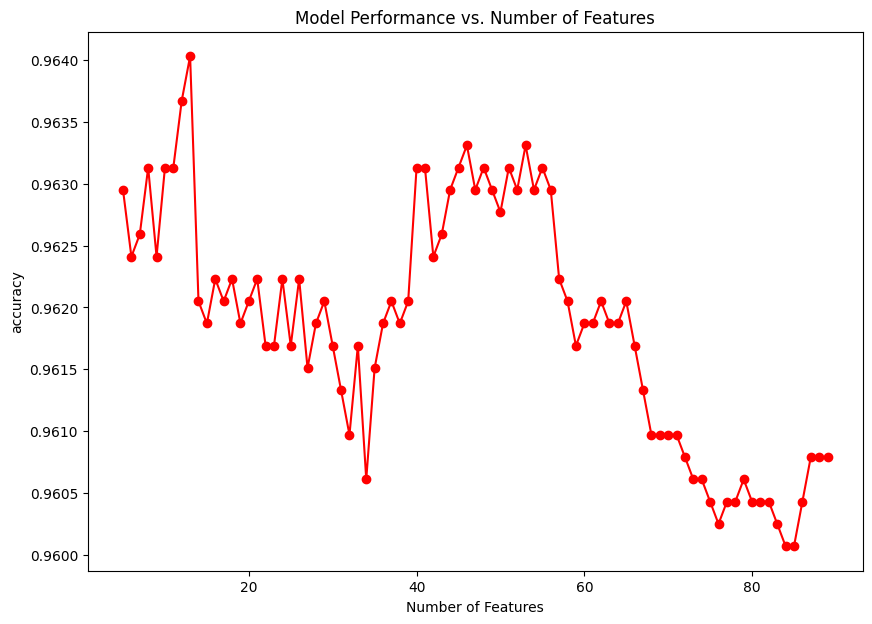

In [20]:
# Optimal no. of features

ml.plot_num_feature_performance(knn_classifier_test,  X, y, final_features, scoring='accuracy')

Finding optimal no. of features..: 100%|████████| 85/85 [00:23<00:00,  3.56it/s]


Maximum f1 = 0.3025 for 5 features


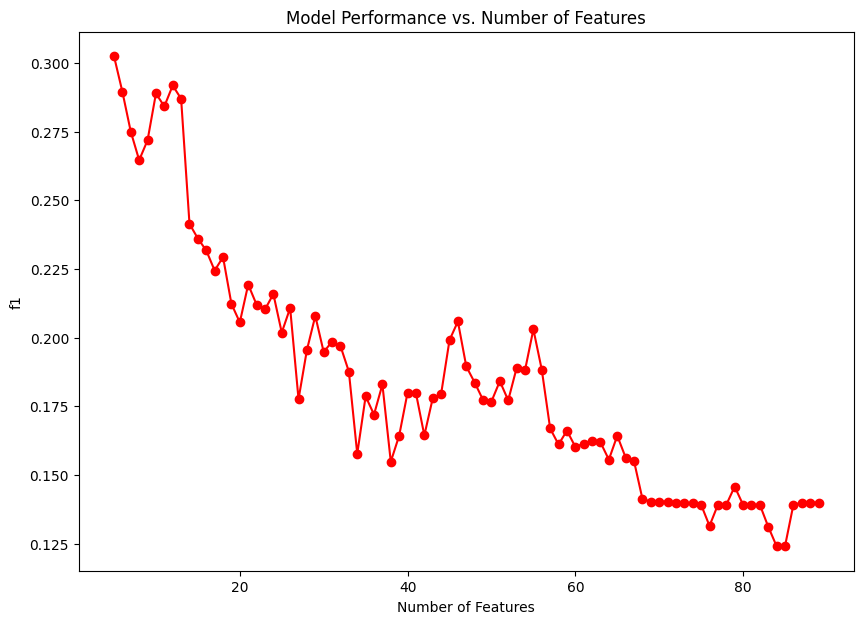

In [21]:
# Optimal no. of features

ml.plot_num_feature_performance(knn_classifier_test,  X, y, final_features, scoring='f1')

Finding optimal no. of features..: 100%|████████| 85/85 [00:23<00:00,  3.61it/s]


Maximum recall = 0.2063 for 5 features


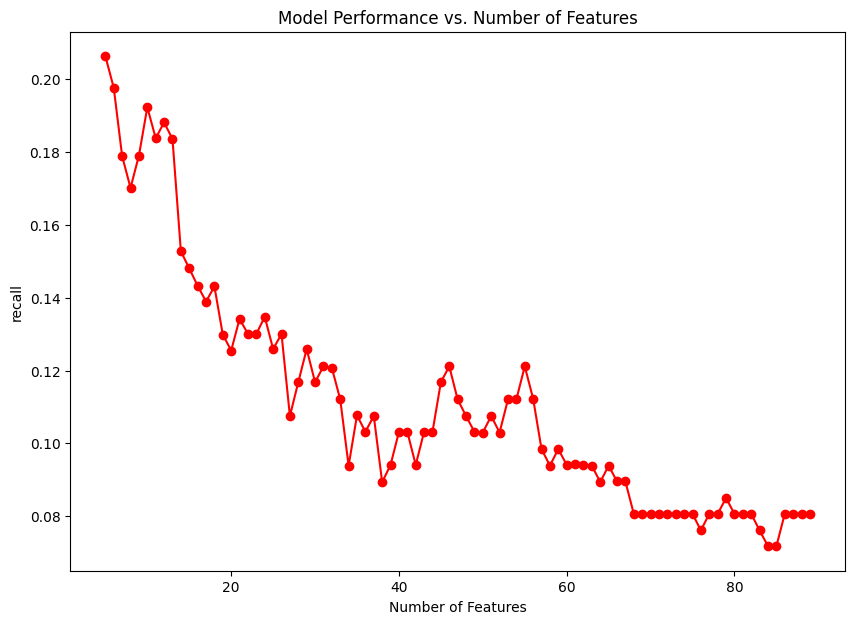

In [22]:
# Optimal no. of features

ml.plot_num_feature_performance(knn_classifier_test,  X, y, final_features, scoring='recall')

In [23]:
num_features = 5

selected = final_features[:num_features]
selected.append('Weak/Failing kidneys')

weak_kidney_df = weak_kidney_df[selected]

In [24]:
# Save feature set
    
with open('../Models/Weak kidneys/Feature Sets/KNN Features.pkl', 'wb') as f:
    ml.pickle.dump(selected, f)

## Preprocessing

### Zero Imputation

In [25]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)

In [26]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.964

Test Accuracy: 0.969

Precision: 0.844

Recall: 0.293

F1-Score: 0.435


### Mode Imputation

In [27]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)

In [28]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.966

Test Accuracy: 0.969

Precision: 0.844

Recall: 0.293

F1-Score: 0.435


### k-NN Imputation

In [29]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)

In [30]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.966

Test Accuracy: 0.969

Precision: 0.844

Recall: 0.293

F1-Score: 0.435


### Multiple Imputation by Chained Equations (MICE)

In [31]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)

In [32]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.966

Test Accuracy: 0.969

Precision: 0.844

Recall: 0.293

F1-Score: 0.435


### Mean Imputation

In [35]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

In [36]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.966

Test Accuracy: 0.969

Precision: 0.844

Recall: 0.293

F1-Score: 0.435


### Dropping Null Values

In [37]:
# Drop null values
weak_kidney_df_na = weak_kidney_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df_na, label = 'Weak/Failing kidneys',
                                                              impute = False, scale=True,
                                                              random_state=42)

In [38]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.967

Test Accuracy: 0.960

Precision: 0.762

Recall: 0.178

F1-Score: 0.288


### Median Imputation

In [39]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)

In [40]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.966

Test Accuracy: 0.969

Precision: 0.844

Recall: 0.293

F1-Score: 0.435


## Oversampling and Undersampling

### Random Oversampling

In [41]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

knn_classifier.fit(X_ros, y_ros)

ml.evaluate_model_metrics(knn_classifier,X_ros, y_ros,X_val, y_val)


Train Accuracy: 0.936

Test Accuracy: 0.954

Precision: 0.473

Recall: 0.967

F1-Score: 0.636


### SMOTE (Synthetic Minority Over-sampling Technique)

In [42]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

knn_classifier.fit(X_smote, y_smote)

ml.evaluate_model_metrics(knn_classifier,X_smote, y_smote,X_val, y_val)


Train Accuracy: 0.937

Test Accuracy: 0.908

Precision: 0.306

Recall: 0.967

F1-Score: 0.465


### Random Undersampling

In [43]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

knn_classifier.fit(X_rus, y_rus)

ml.evaluate_model_metrics(knn_classifier,X_rus, y_rus,X_val, y_val)


Train Accuracy: 0.761

Test Accuracy: 0.777

Precision: 0.128

Recall: 0.761

F1-Score: 0.220


### Tomek Links

In [44]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

knn_classifier.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(knn_classifier,X_tomek, y_tomek,X_val, y_val)


Train Accuracy: 0.967

Test Accuracy: 0.969

Precision: 0.811

Recall: 0.326

F1-Score: 0.465


### SMOTE + Tomek Links

In [45]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

knn_classifier.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(knn_classifier,X_smote_tomek, y_smote_tomek,X_val, y_val)


Train Accuracy: 0.941

Test Accuracy: 0.911

Precision: 0.312

Recall: 0.967

F1-Score: 0.472


In [47]:
# Model seems to perform with ROS

X_train, y_train = X_ros, y_ros

## Hyperparameter Optimization 

### Grid Search

In [48]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [49]:
grid_best_params, knn_classifier_grid = ml.grid_search_optimize(knn_classifier, param_grid, X_train, 
                                                                y_train, cv=10,scoring='accuracy')

In [50]:
grid_best_params

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

### Random Search

In [51]:
rand_best_params, knn_classifier_rand = ml.random_search_optimize(knn_classifier,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy')

In [52]:
rand_best_params

{'weights': 'distance', 'p': 1, 'n_neighbors': 3, 'algorithm': 'auto'}

### Optuna

In [53]:
def objective(trial):

    n_neighbors = trial.suggest_int('n_neighbors', 3, 15)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    p = trial.suggest_int('p', 1, 2)
    
    model = ml.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, p=p)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = ml.accuracy_score(y_test, y_pred)

    return accuracy

In [54]:
best_trial , knn_classifier_opt = ml.optuna_optimize(objective, ml.KNeighborsClassifier, n_trials=150)

In [55]:
best_trial

{'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'brute', 'p': 2}

## Evaluation on Test Set


Train Accuracy: 0.960

Test Accuracy: 0.995

Precision: 1.000

Recall: 0.885

F1-Score: 0.939

Confusion Matrix:

[[2128    0]
 [  11   85]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00      2128
     Class 1       1.00      0.89      0.94        96

    accuracy                           1.00      2224
   macro avg       1.00      0.94      0.97      2224
weighted avg       1.00      1.00      0.99      2224


ROC-AUC Curve:


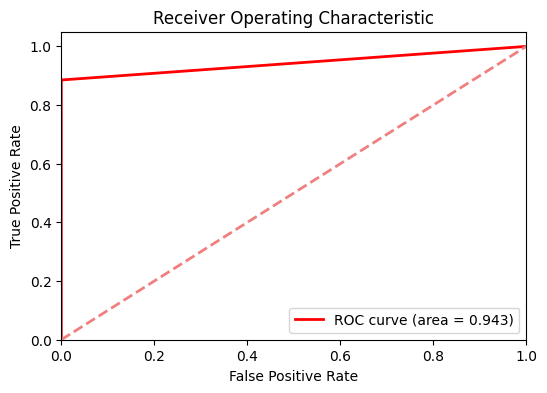

In [56]:
# After evaluating on the validation set, we evaluate and finalize on the test set

ml.evaluate_model_metrics(knn_classifier_rand, X_train, y_train, X_test, y_test, verbose=6)

## Cross Validation

### K-fold

In [57]:
ml.k_cross_validate(knn_classifier,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.96582734 0.96402878 0.96402878 0.96582734 0.95503597 0.96043165
 0.96223022 0.96582734 0.96402878 0.96223022]

Mean accuracy score:  0.9629496402877697

Standard deviation:  0.003135898520532867


In [58]:
ml.k_cross_validate(knn_classifier_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.96043165 0.95323741 0.95503597 0.96402878 0.95863309 0.95863309
 0.96043165 0.96402878 0.96223022 0.96223022]

Mean accuracy score:  0.9598920863309353

Standard deviation:  0.003417266187050376


In [59]:
ml.k_cross_validate(knn_classifier_rand,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.96043165 0.95323741 0.95503597 0.96402878 0.95863309 0.95863309
 0.96043165 0.96402878 0.96223022 0.96223022]

Mean accuracy score:  0.9598920863309353

Standard deviation:  0.003417266187050376


In [60]:
ml.k_cross_validate(knn_classifier_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.9676259  0.96402878 0.96582734 0.96942446 0.95863309 0.95683453
 0.96043165 0.97122302 0.96223022 0.96043165]

Mean accuracy score:  0.9636690647482015

Standard deviation:  0.004535798637740437


### Stratified K-fold

In [61]:
ml.stratified_k_cross_validate(knn_classifier,X,y,n_splits=10)


Average Accuracy: 0.9627697841726619

Average Precision: 0.6146320346320346

Average Recall: 0.2110671936758893

Average F1-Score: 0.3116683460217943


In [62]:
ml.stratified_k_cross_validate(knn_classifier_grid,X,y,n_splits=10)


Average Accuracy: 0.9591726618705035

Average Precision: 0.4887370962370963

Average Recall: 0.2199604743083004

Average F1-Score: 0.29926952603185997


In [63]:
ml.stratified_k_cross_validate(knn_classifier_rand,X,y,n_splits=10)


Average Accuracy: 0.9591726618705035

Average Precision: 0.4887370962370963

Average Recall: 0.2199604743083004

Average F1-Score: 0.29926952603185997


In [64]:
ml.stratified_k_cross_validate(knn_classifier_opt,X,y,n_splits=10)


Average Accuracy: 0.9627697841726619

Average Precision: 0.6025396825396825

Average Recall: 0.1972332015810277

Average F1-Score: 0.2949460379257376


### Save Model

In [65]:
final_knn_estimator = knn_classifier

In [66]:
# Saving the model

ml.save_model(final_knn_estimator, "../Models/Weak kidneys/KNN.pkl")

Saved Model


## Prediction

In [67]:
# Predicting on perturbed values

sc = ml.np.random.rand()

ml.predict_on_modified_instance(final_knn_estimator, X_test.iloc[0], y_test.iloc[0], sc)

Instance:
 [-1.17209534 -0.68801717 -1.03438808 -0.92913778 -2.16457945]

Expected Class:  0

 Modified Instance:
 [-1.17209534 -0.8052853  -0.95154481 -1.02775425 -2.38782396]

Predicted Class:  [0]


In [71]:
ml.predict_on_modified_instance(final_knn_estimator, X_test.iloc[20], y_test.iloc[20], sc)

Instance:
 [0.21446851 0.94922231 0.35368996 0.47887696 1.18098251]

Expected Class:  1

 Modified Instance:
 [0.21446851 0.98092968 0.27634546 0.5642702  1.51069238]

Predicted Class:  [0]


In [74]:
# Predicting on perturbed values

ml.predict_on_modified_instance(final_knn_estimator, X_test.iloc[34], y_test.iloc[34], sc)

Instance:
 [-1.17209534  3.46273081  2.43580703  0.19727401 -0.25282976]

Expected Class:  1

 Modified Instance:
 [-1.17209534  3.59364977  2.31018199  0.13121664 -0.36931014]

Predicted Class:  [1]
